<a href="https://colab.research.google.com/github/akipi-ro/daily_study/blob/master/Google%E3%82%B9%E3%82%AF%E3%83%AC%E3%82%A4%E3%83%94%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests

from bs4 import BeautifulSoup#HTMLタグの情報をピンポイントで保存

In [2]:
#BeautifulSoupだけを使ってHTMLを読み込むと画像が準備されていない状態のHTMLが読み込まれる。画像の読み込みを待たずにHTMLを取得しているから。全ての要素を読み込んでからHTMLを取得するためにはBSだけではやり辛い
#Seleniumの準備
# Seleniumを使用するのに必要なライブラリをダウンロード
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

from selenium import webdriver

# ドライバーをUIなしで使用するための設定
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=options)
driver.implicitly_wait(10)


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu

In [3]:
query = "橋本環奈"#クエリは検索ワード
url ="https://www.google.com/search?q=%E6%A9%8B%E6%9C%AC%E7%92%B0%E5%A5%88&sxsrf=ALeKk03Ns7dOJD0lNc-huSi61_gWZ8kbIQ:1591531054689&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiQnqeZ0-_pAhUPHXAKHeFHCSgQ_AUoAXoECBcQAw&biw=1920&bih=969".format(query)
url

'https://www.google.com/search?q=%E6%A9%8B%E6%9C%AC%E7%92%B0%E5%A5%88&sxsrf=ALeKk03Ns7dOJD0lNc-huSi61_gWZ8kbIQ:1591531054689&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiQnqeZ0-_pAhUPHXAKHeFHCSgQ_AUoAXoECBcQAw&biw=1920&bih=969'

In [0]:
#BSを使ってhtmlを解析する
driver.get(url)
html = driver.page_source.encode("utf-8")#まずセレニウム経由でHTMLを取得　ページ上の全ての画像が読み込まれた状態のHTMLを取得することができる
soup = BeautifulSoup(html, "html.parser")#取得したら文字コードの設定、終わったらbsに結果を返す

<html dir="ltr" itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><script nonce="" src="https://www.gstatic.com/_/mss/boq-search/_/js/k=boq-search.VisualFrontendUi.en_US.M7hu59mz5zk.es5.O/ck=boq-search.VisualFrontendUi.VJyMACMJMQc.L.B1.O/am=RAIEvZC_iRBBhAAEDB8GAIEMkEAABIQARAACHAAAAACACwAAAABARQAAAGQB/d=1/exm=A7fCU,BVgquf,BW3n6e,BjFh9c,CBlRxf,COQbmf,CPV8xb,Caa0Rb,E7zqub,EFQ78c,EVgswe,Ewg6Fc,Fkg7bd,Fu9gHf,GFartf,GJRHN,HD2L6c,HDvRde,HLo3Ef,HcFEGb,Hwdy8d,IBgLbc,IQwU3b,IZT63,JFD9Jd,JNcJEf,JNoxi,JxWeid,K3moCf,KG2eXe,KKCEyb,Kx9fZb,L1AAkb,LdUV1b,MI6k7c,MkHyGd,NgrqFf,NpD4ec,O2Ss4b,OF7gzc,OG6ZHd,OmgaI,OvCQqe,OxmTpe,OyRb3,PDO5jf,PQaYAf,PrPYRd,Q1cwAf,QDuJ2b,QIhFr,QY2Csd,QtPCpb,Qurx6b,R61i4b,RMhBfe,Rr5NOe,S1avQ,SF3gsd,SI4J6c,SM1lmd,SXFjXc,SdcwHb,SpsfSb,SzgBTb,T3doB,T4BAC,T6sTsf,T7XTS,T8nZfb,TZG3Xc,TlXKQe,Tqk93,U0aPgd,UBkHac,UKPnme,USRBGf,UWdB6e,UZGQG,Uas9Hd,UgAtXe,V3dDOb,VX3lP,Vchpic,VwDzFe,WLmhxf,WO9ee,WVCDgf,Wf0Cmd,Wq6lxf,XAzchc,XVMNvd,XXP8w,Y9atKf,YKtnsf,Za1nH,ZfAoz,ZwD
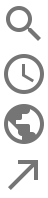
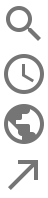
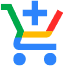
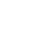
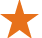
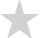
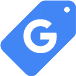
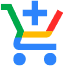
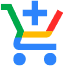
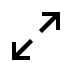
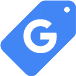
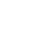
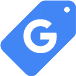
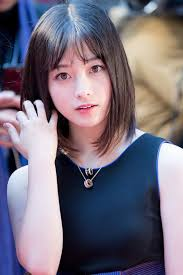
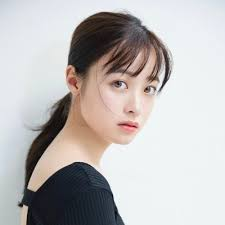
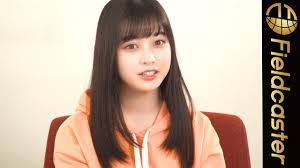
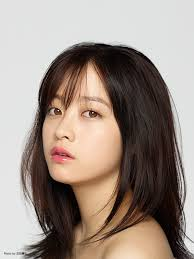
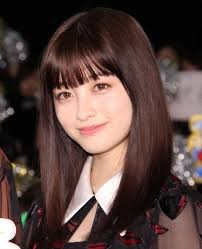
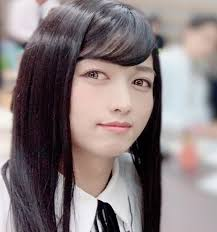
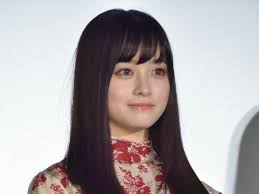
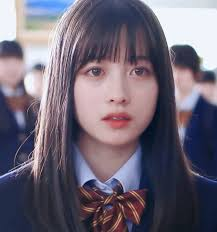
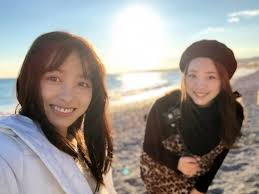
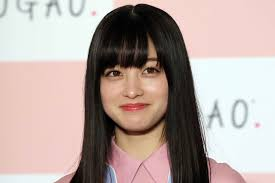
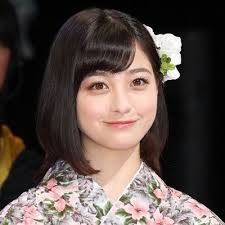
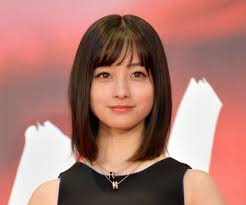
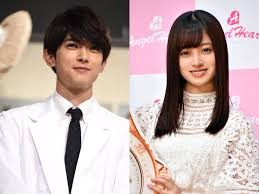
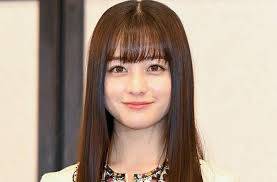
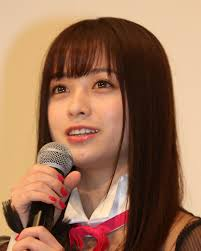
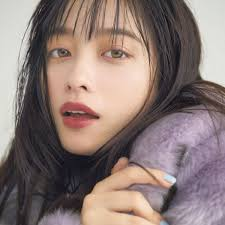
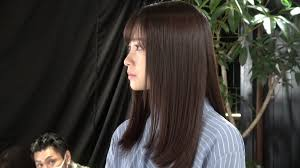
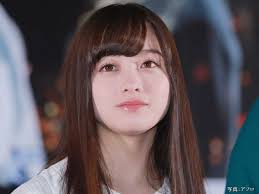
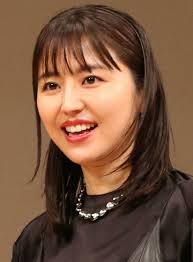
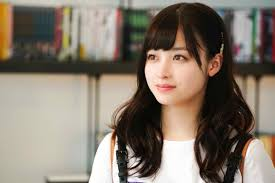

In [5]:
soup

In [6]:
"""
以下のコードは覚える必要はない。コピペ
"""
#セレニウムを使って全ての要素が読み込まれるまで待つという設定を行う
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# すべての要素が読み込まれるまで待つ。タイムアウトは15秒。
WebDriverWait(driver, 15).until(EC.presence_of_all_elements_located)

[<img alt="橋本環奈 - Wikipedia" class="rg_i Q4LuWd tx8vtf" data-atf="true" data-deferred="1" data-iml="883.3949999999504" jsname="Q4LuWd" src=""/>,
 <img alt="橋本環奈 (@H_KANNA_0203) | Twitter" class="rg_i Q4LuWd tx8vtf" data-atf="true" data-deferred="1" data-iml="883.5950000000139" jsname="Q4LuWd" src=""/>,
 <img alt="マンガ好き”橋本環奈、最近BLが気になる？ 『キングダム』イッキ読みで ..." class="rg_i Q4LuWd tx8vtf" data-atf="true" data-deferred="1" data-iml="883.685000000014" jsname="Q4LuWd" src=""/>,
 <img alt="橋本環奈 | ディスカバリーネクスト" class="rg_i Q4LuWd tx8vtf" data-atf="true" data-deferred="1" data-iml="883.754999999951" jsname="Q4LuWd" src=""/>,
 <img alt="今日から俺は！！：“京子”橋本環奈、最後まで“ぶりっ子”発揮 「可愛 ..." class="rg_i Q4LuWd tx8vtf" data-atf="true" data-deferred="1" data-iml="883.8499999999385" jsname="Q4LuWd" src=""/>,
 <img alt="橋本環奈のものまねで注目の泉クリス「男性なの？」「そっくり」と話題 ..." class="rg_i Q4LuWd tx8vtf" data-atf="true" data-deferred="1" data-iml="883.9349999999513" jsname="Q4LuWd" src=""/>,
 <img alt="橋本環奈、ノーメイクの“盛れた写真”にファン仰天「透明感がすごい ..." c
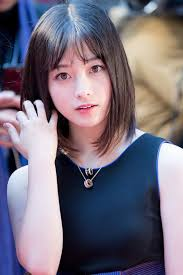
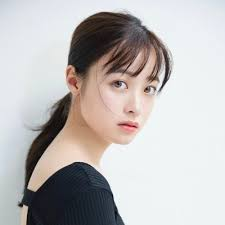
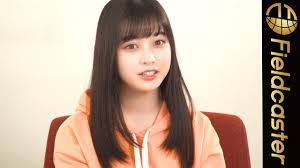
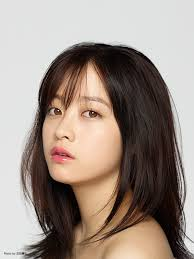
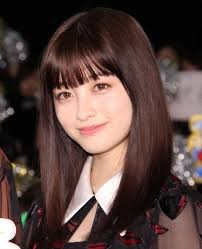
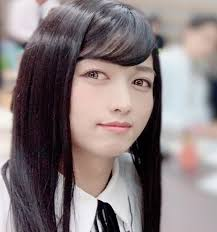
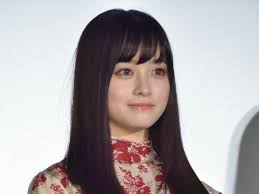
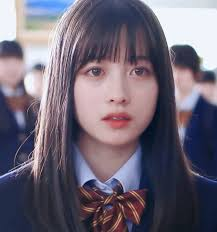
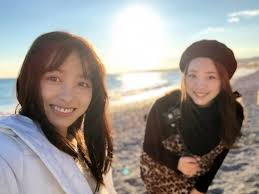
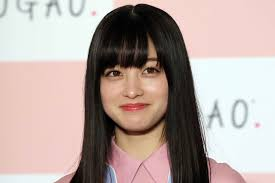
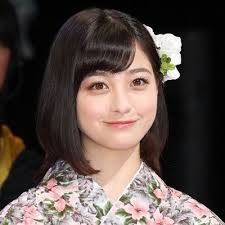
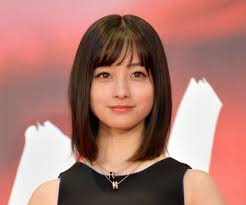
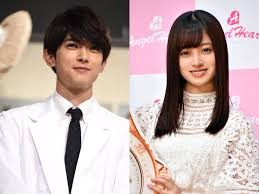
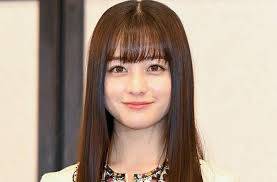
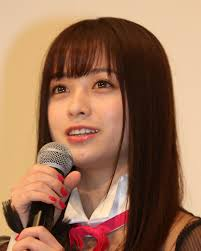
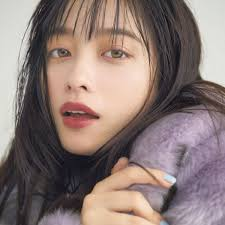
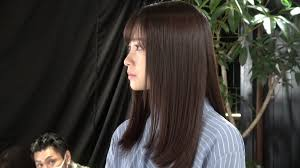
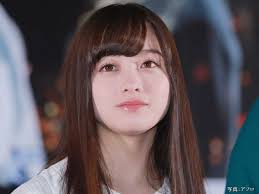
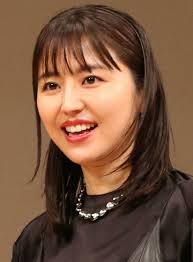
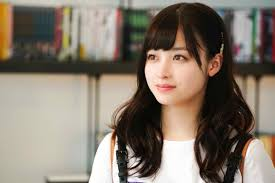

In [7]:
#bsを使ってHTMLを解析して特定のタグ情報を取得する
soup.find_all("img")#指定したタグに該当してた要素をリストで返せる

In [0]:
img_tags = soup.find_all("img")#imgタグのリストを変数に代入

In [9]:
len(img_tags)#取得したimgタグの数を出力

50




1.  base64　　　　　　　　　　画像をテキストにしている　　素早く読み込める　　テキスト→画像（デコード）
2.  普通の画像　　　　data-src属性にurlが入っている　それを抜き出す























https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcROaaSuXrD6arZYY4AgwbtjebZSi12zghzAu5JLLeiu_z9-2L9w&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQEwq3_hRVgJYefWj82HAO_OSYm4YZU34ZeHHBy4IB2xEc5C4ft&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSIDTMkTjDZYDKbmIZ9_nseXjviZN-aqjpFkTrv8kuVPteiSN8Y&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS-jRzFd4KCis4gFjyma10hgUba3dITGVXW5agJgobSxCA2u8Tj&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRyJ13SbpL9ZWfEt5oYZFES-DxKjK7nSu0cS1VJeeHH2Qz2a2k_&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQzkRGssFmVbKBhLdL4h1DcahhOj4Oqjh7m-KIsRW-H7QEXGRdk&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQn4bCpB7DDkP-8knyO_GBOw3q7TMfL-_QlgNojR_TxkxpC0pMo&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQpwBWyQM3w7Qz0-0VguPGQvLLJx6BGrZclSgH64aPVDh5kv9uN&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AAN
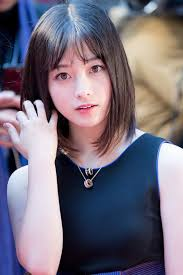
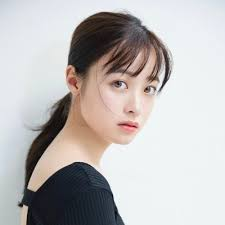
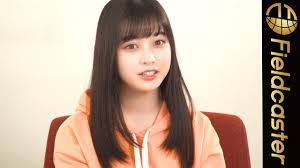
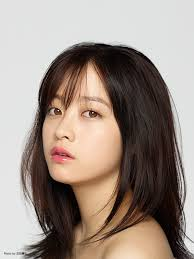
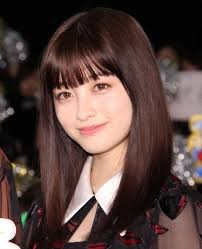
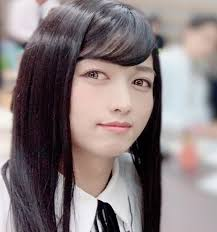
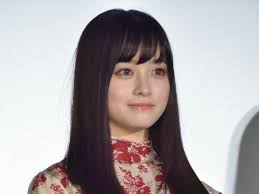
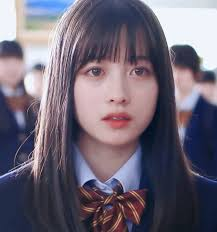
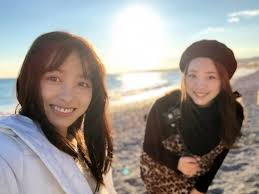
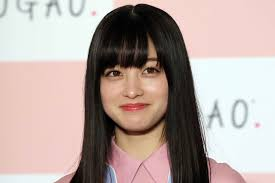
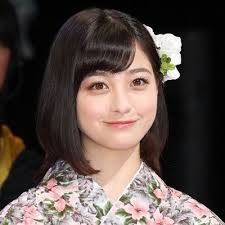
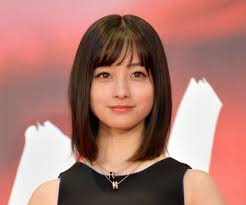
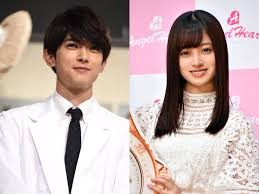
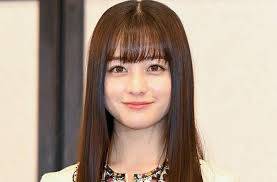
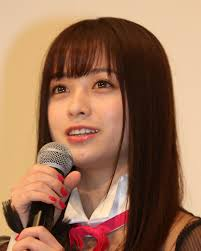
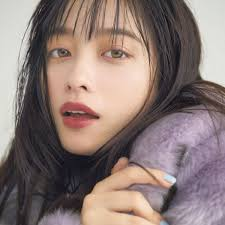
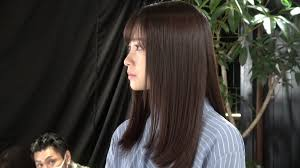
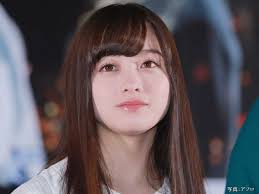
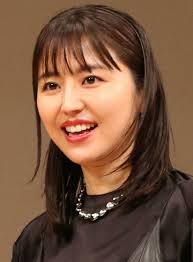
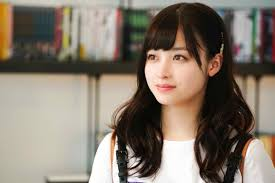

In [14]:
#urlとベース６４の情報を取得していく
img_urls = []

for img_tag in img_tags:#イメージタグのリストを回す
  url = img_tag.get("src")#get関数を使えば属性情報を取得できる　　ここでsrcでbase６４の情報だけ取得できた
  # print(url)

  if url is None:
    url = img_tag.get("data-src")

  if url is not None:
    img_urls.append(url)
    print(url)

#画像をダウンロードする関数

In [0]:
"""
以下のコードは覚える必要はない。コピペでOK。
"""
def download_image(url, file_path):
  r = requests.get(url, stream=True)

  if r.status_code == 200:
    with open(file_path, "wb") as f:
      f.write(r.content)

#Base64をデコードして画像に戻す関数

In [0]:
"""
以下のコードは覚える必要はない。コピペでOK。
"""
import base64

def save_base64_image(data, file_path):
  img = base64.b64decode(data.encode())
  with open(file_path, "wb") as f:
      f.write(img)

In [0]:
import os
import re

save_dir ="/content/drive/My Drive/Colab Notebooks/つくプロ/大量"

os.makedirs(save_dir, exist_ok=True)#念のためディレクトリがない場合は新規作成するコードをつける

base64_string = "data:image/jpeg;base64,"#接頭辞

for index, url in enumerate(img_urls):# enumerateを使えばリストのindexを取得できます。このindexをそのままファイル名にする

  file_name = "{}.jpg".format(index)# formatを使えば文字列内の指定した場所に変数の内容を入れることができる
  # print(file_name)
  # print(url)



  """
  os.path.joinを使えば引数に指定した文字列をパスの形に繋げる(joinする）ことができる

  例: os.path.join("A", "B")は「A/B」を出力します
  """
  image_path = os.path.join(save_dir, file_name)#image_pathがパスの形　filenameが指定した文字列

  if len(re.findall(base64_string, url)) > 0:#reをインポートで正規表現が使える　　base64_stringで接頭辞を設定したので一致する物を次で消す　　　Base64と判断して
    url = url.replace(base64_string, "")#接頭辞を削除　
    save_base64_image(data=url, file_path=image_path)
  else:
    download_image(url=url, file_path=image_path)





橋本環奈」以外の検索ワードでも試す
「橋本環奈　かわいい」で検索したらダウンロード済みの画像があったとして、それらの画像をダウンロードしないようにするにはどうしたらいいか

今回スクレイピングした画像は画質が悪く大きさも小さい。高画質の画像をGoogle画像検索からスクレイピングする方法も考える

Google画像検索はスクロールするたびに新しい画像が読み込まれます。スクロールして新しく読み込まれた画像もスクレイピングするにはどうしたらいいか